In [483]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [484]:
df=pd.read_csv(r"C:\Users\varungo\Downloads\train.csv")

In [485]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [486]:
df.shape

(1460, 81)

In [404]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [405]:
df.isnull().sum().head(50)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

# checking the effect of nan value features with respect to salesprice

In [406]:
feature_nan=[feature for feature in df if df[feature].isnull().sum() >= 1]
len(fearture_nan)

#nan values in percentage for each column in the train data
for feature in feature_nan :
    print(np.round(df[feature].isnull().sum()/df.shape[0],4))
    
    

0.1774
0.9377
0.0055
0.0055
0.0253
0.0253
0.026
0.0253
0.026
0.0007
0.4726
0.0555
0.0555
0.0555
0.0555
0.0555
0.9952
0.8075
0.963


# replacing NaN with 1 and non NaN value with 0

In [407]:
  data=df.copy()
for feature in feature_nan :
    data[feature]=np.where(data[feature].isnull(),1,0)
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,0,8450,Pave,1,Reg,Lvl,AllPub,...,0,1,1,1,0,2,2008,WD,Normal,208500
1,2,20,RL,0,9600,Pave,1,Reg,Lvl,AllPub,...,0,1,1,1,0,5,2007,WD,Normal,181500
2,3,60,RL,0,11250,Pave,1,IR1,Lvl,AllPub,...,0,1,1,1,0,9,2008,WD,Normal,223500
3,4,70,RL,0,9550,Pave,1,IR1,Lvl,AllPub,...,0,1,1,1,0,2,2006,WD,Abnorml,140000
4,5,60,RL,0,14260,Pave,1,IR1,Lvl,AllPub,...,0,1,1,1,0,12,2008,WD,Normal,250000
5,6,50,RL,0,14115,Pave,1,IR1,Lvl,AllPub,...,0,1,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,0,10084,Pave,1,Reg,Lvl,AllPub,...,0,1,1,1,0,8,2007,WD,Normal,307000
7,8,60,RL,1,10382,Pave,1,IR1,Lvl,AllPub,...,0,1,1,0,350,11,2009,WD,Normal,200000
8,9,50,RM,0,6120,Pave,1,Reg,Lvl,AllPub,...,0,1,1,1,0,4,2008,WD,Abnorml,129900
9,10,190,RL,0,7420,Pave,1,Reg,Lvl,AllPub,...,0,1,1,1,0,1,2008,WD,Normal,118000


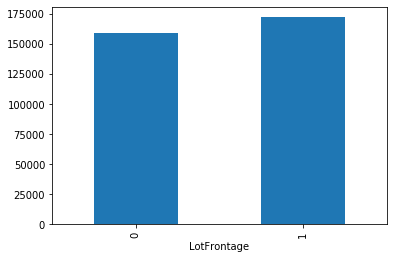

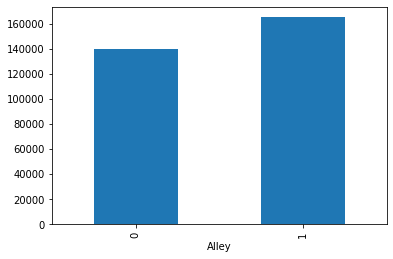

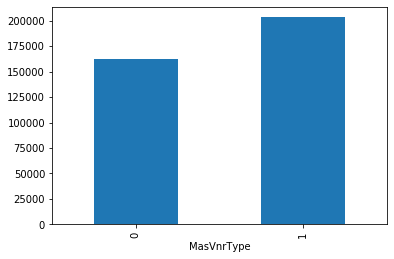

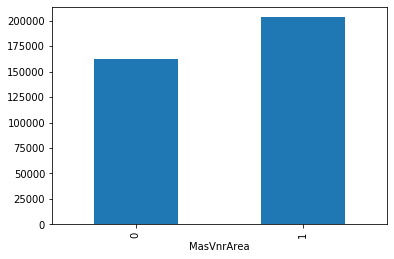

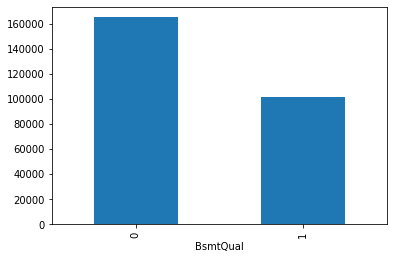

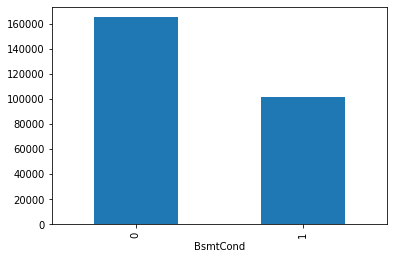

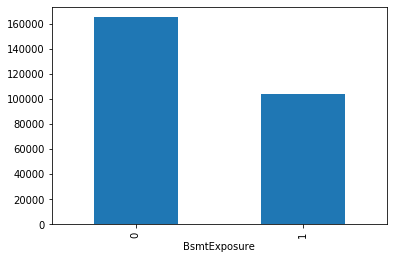

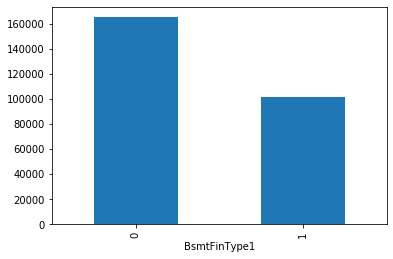

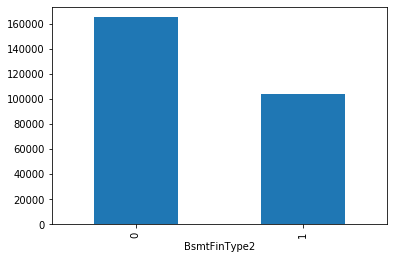

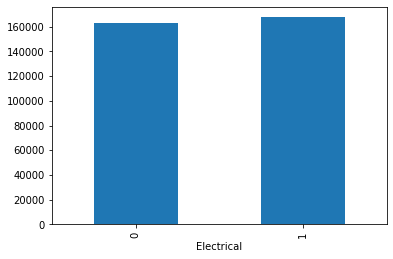

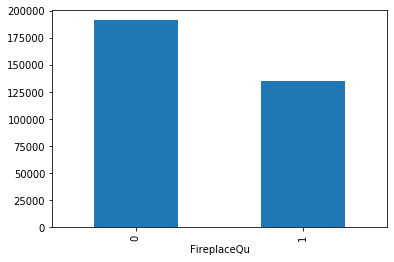

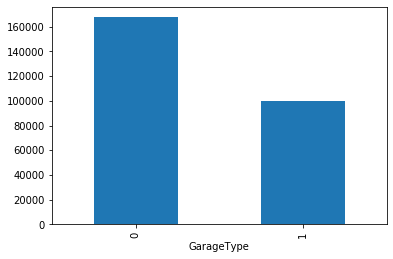

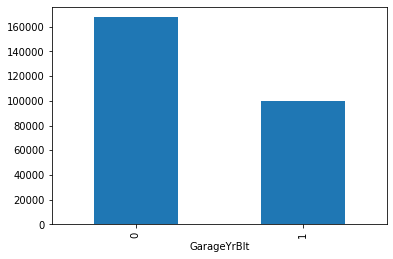

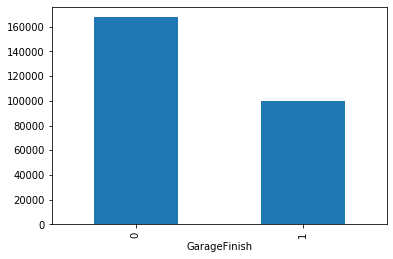

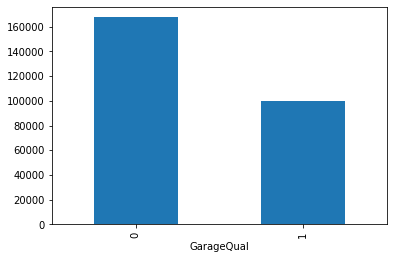

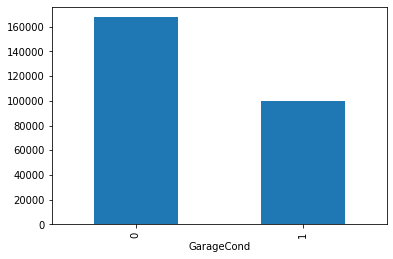

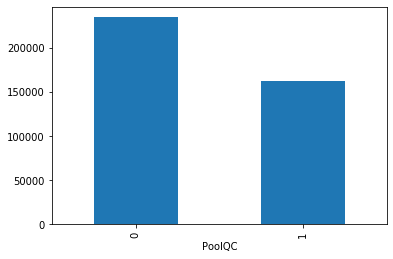

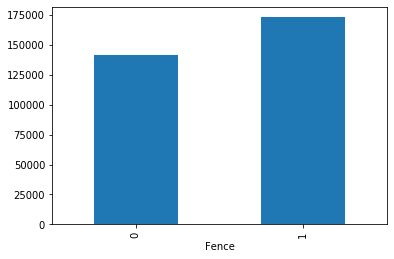

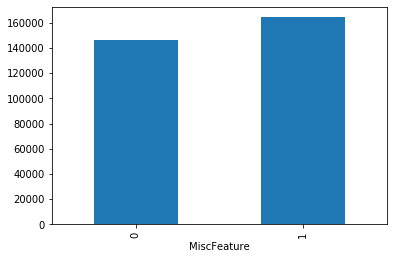

In [408]:
for feature in feature_nan :
    data.groupby(feature)["SalePrice"].median().plot(kind="bar")
    plt.show()

# numaric feature

In [409]:
numerical_feature=[feature for feature in df if df[feature].dtypes != 'O']
print("numerical_feature=",numerical_feature)

numerical_feature= ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


# temprevary features

In [410]:
temp_feature=[feature for feature in df if  'Yr' in feature or "Year" in feature]
temp_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

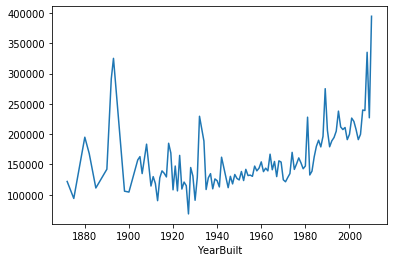

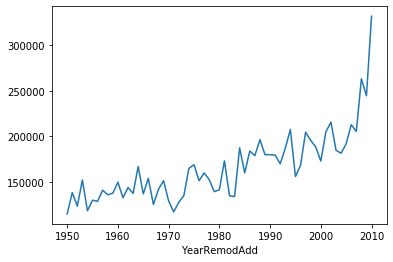

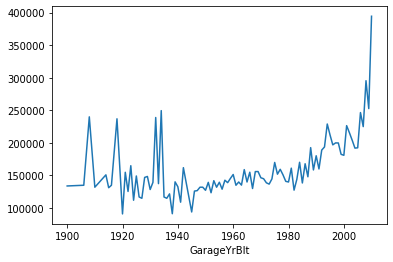

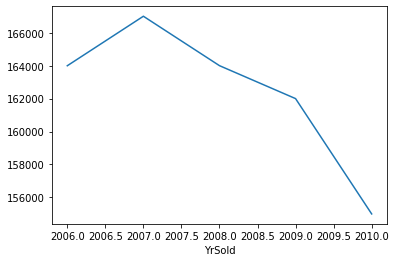

In [411]:
data=df.copy()
for feature in temp_feature :
        data.groupby(feature)["SalePrice"].median().plot()
        plt.show()

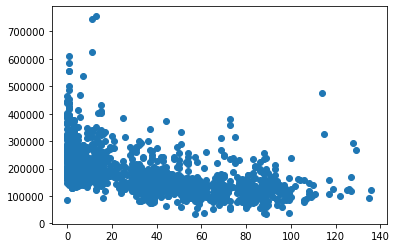

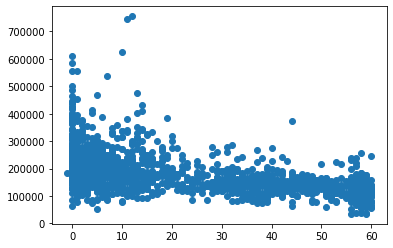

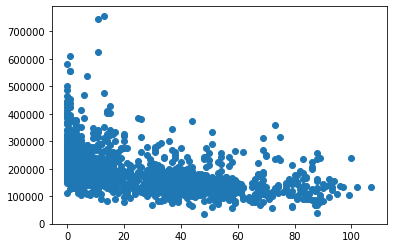

In [412]:
data=df.copy()
for feature in temp_feature :
    if feature != "YrSold":
        data[feature]=data["YrSold"]-data[feature]
        plt.scatter(data[feature],data["SalePrice"])
        plt.show()
    

# discrete feature in numaric feature

In [413]:
data=df.copy()
discrete_feature=[feature for feature in numerical_feature if len(data[feature].unique()) < 25 and feature not in temp_feature+["Id"]  ]
print(discrete_feature)
print(len(discrete_feature))

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']
17


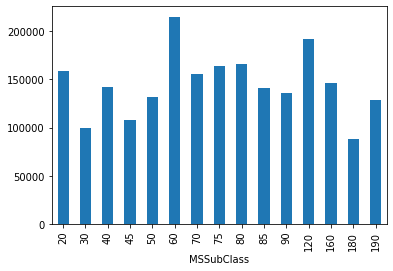

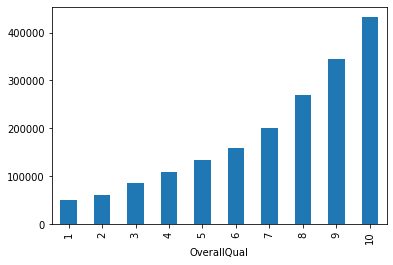

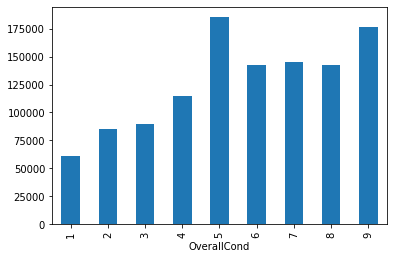

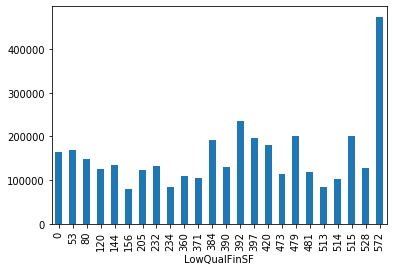

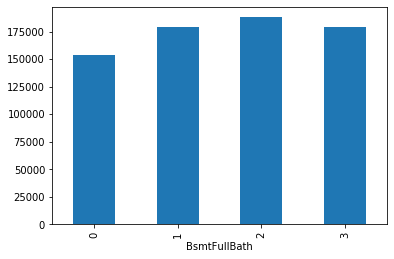

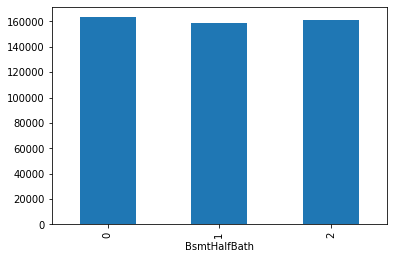

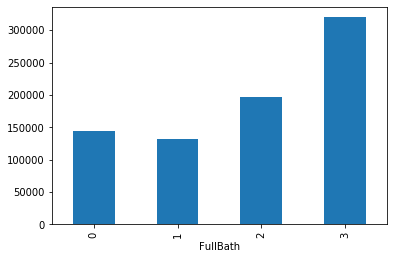

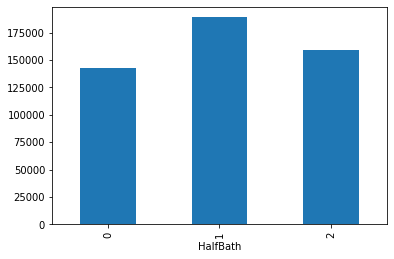

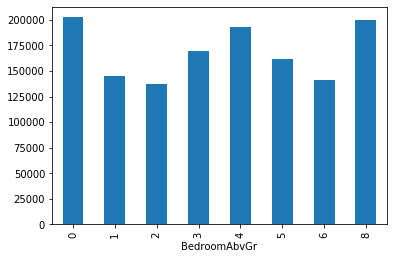

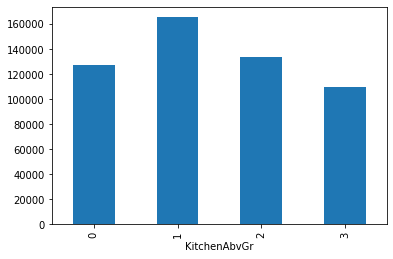

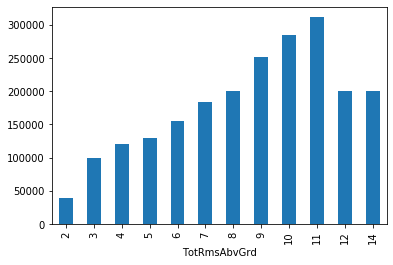

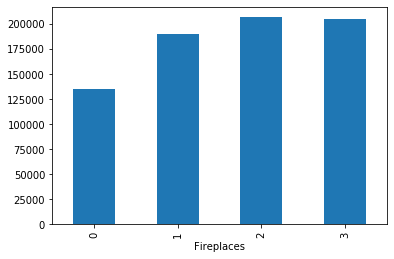

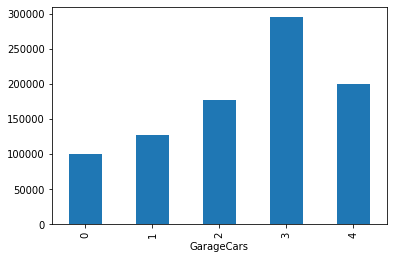

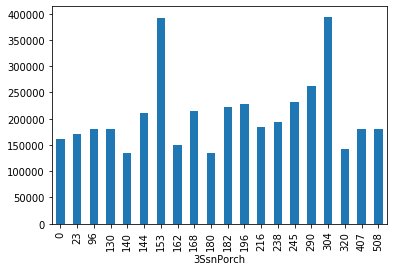

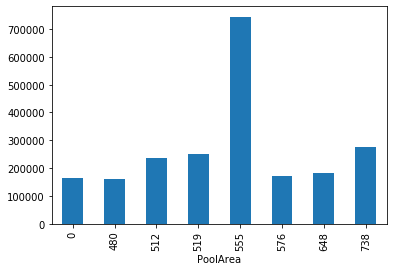

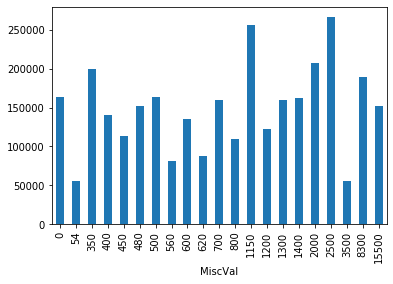

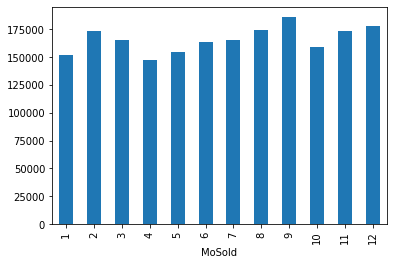

In [414]:
for feature in discrete_feature :
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.show()

# continueous feature in numerical feature

In [415]:
data=df.copy()
continue_feature=[feature for feature in numerical_feature if feature not in discrete_feature and feature not in temp_feature+["Id"] ]
print(continue_feature)
print(len(continue_feature))

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
16


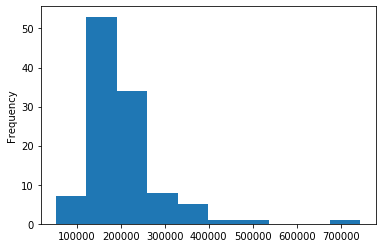

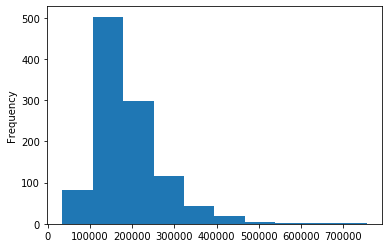

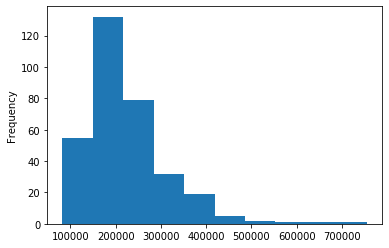

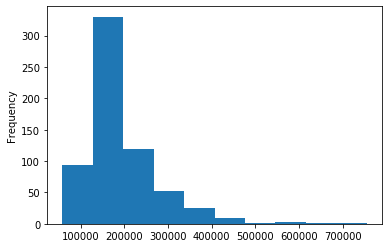

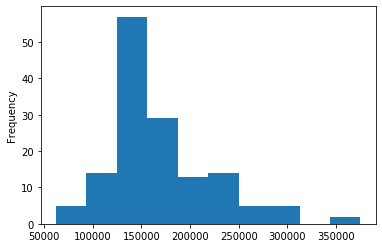

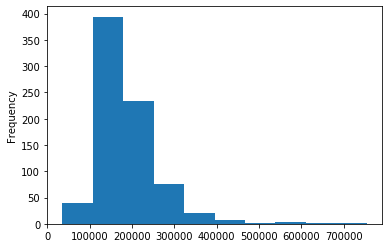

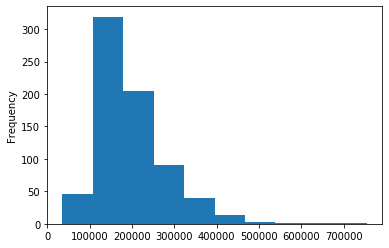

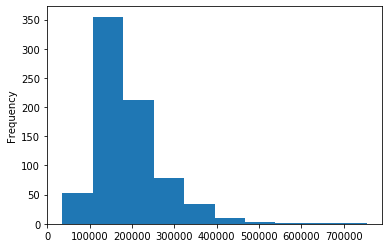

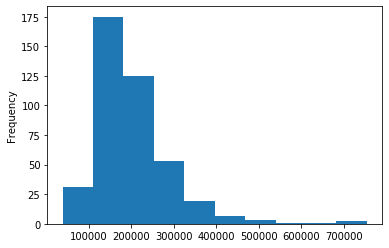

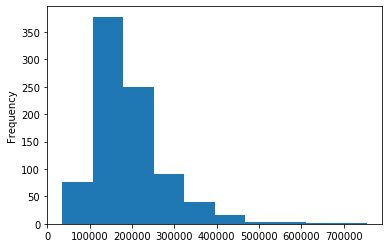

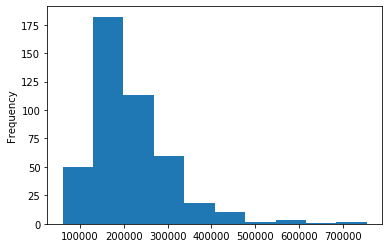

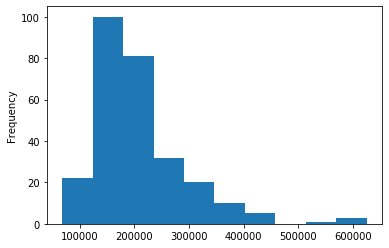

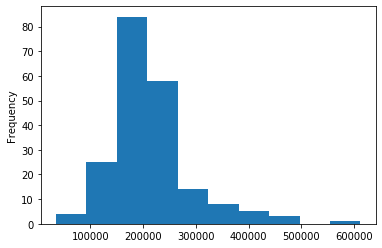

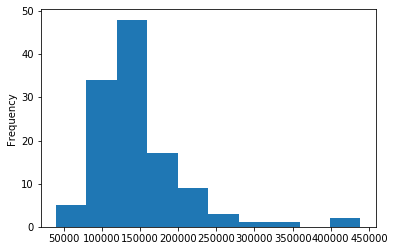

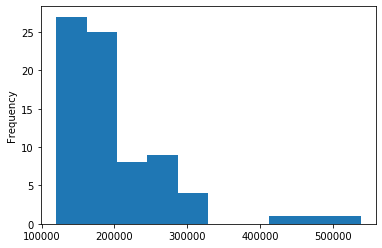

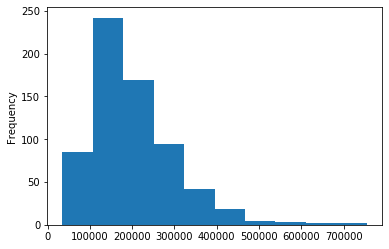

In [416]:
for feature in continue_feature :
    data.groupby(feature)["SalePrice"].median().plot.hist()
    plt.show()

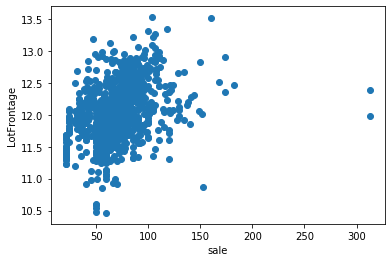

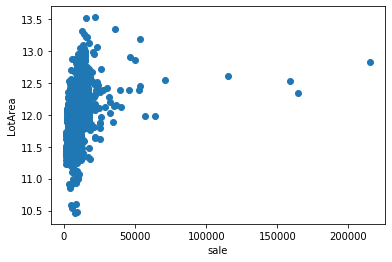

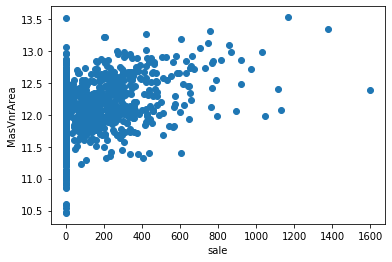

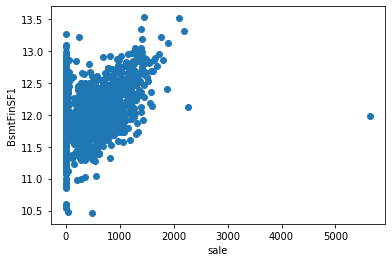

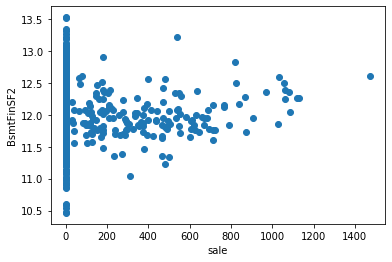

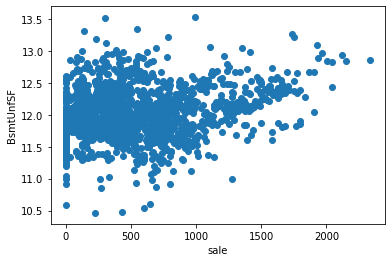

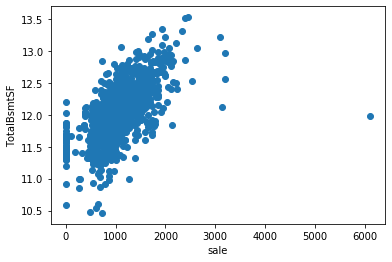

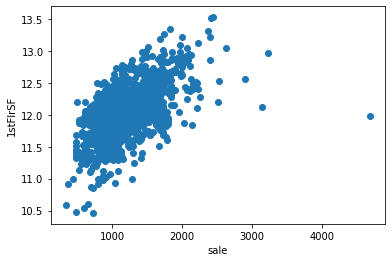

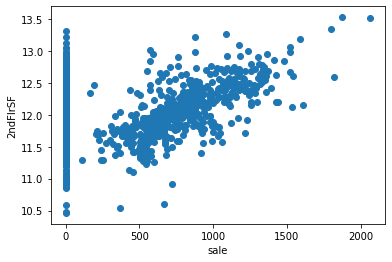

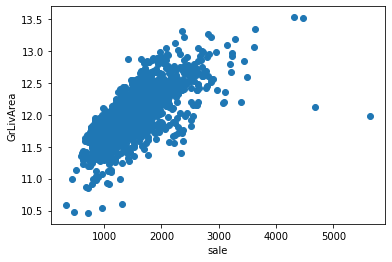

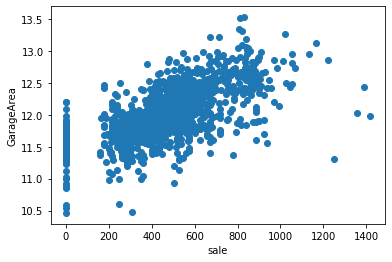

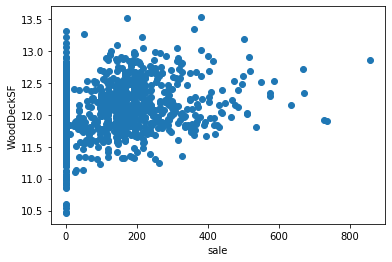

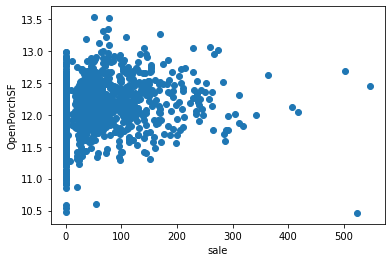

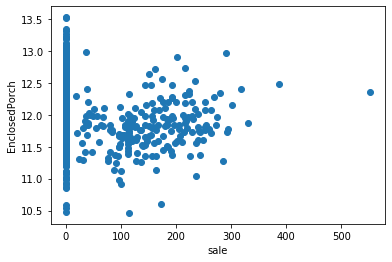

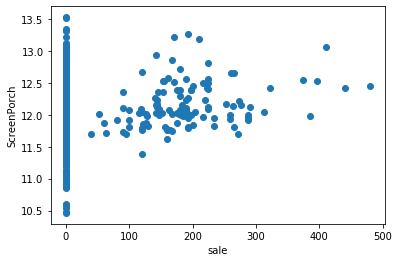

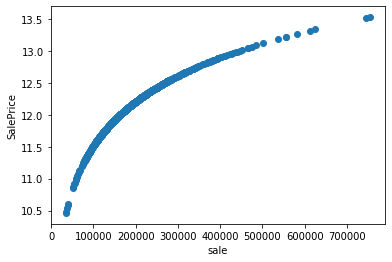

In [417]:
for feature in continue_feature :
    plt.scatter(data[feature],np.log(data["SalePrice"]))
    plt.xlabel("sale")
    plt.ylabel(feature)
    plt.show()

# catogorical features

In [418]:
data=df.copy()
cat_feature=[feature for feature in df if data[feature].dtypes == "O" and feature not in temp_feature+["Id"] ]
print(cat_feature)
print(len(cat_feature))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
43


In [419]:
for feature in cat_feature :
    print("unique value of",feature,"=",len(data[feature].unique()))

unique value of MSZoning = 5
unique value of Street = 2
unique value of Alley = 3
unique value of LotShape = 4
unique value of LandContour = 4
unique value of Utilities = 2
unique value of LotConfig = 5
unique value of LandSlope = 3
unique value of Neighborhood = 25
unique value of Condition1 = 9
unique value of Condition2 = 8
unique value of BldgType = 5
unique value of HouseStyle = 8
unique value of RoofStyle = 6
unique value of RoofMatl = 8
unique value of Exterior1st = 15
unique value of Exterior2nd = 16
unique value of MasVnrType = 5
unique value of ExterQual = 4
unique value of ExterCond = 5
unique value of Foundation = 6
unique value of BsmtQual = 5
unique value of BsmtCond = 5
unique value of BsmtExposure = 5
unique value of BsmtFinType1 = 7
unique value of BsmtFinType2 = 7
unique value of Heating = 6
unique value of HeatingQC = 5
unique value of CentralAir = 2
unique value of Electrical = 6
unique value of KitchenQual = 4
unique value of Functional = 7
unique value of Fireplac

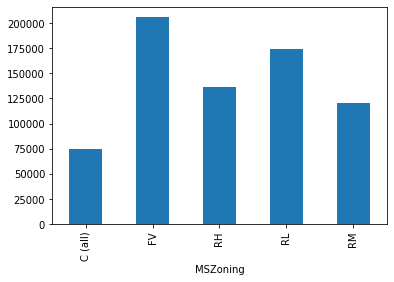

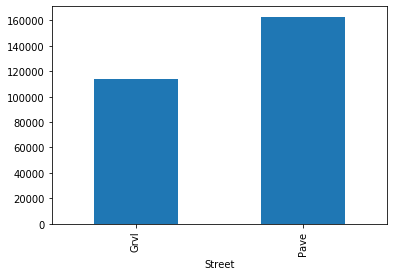

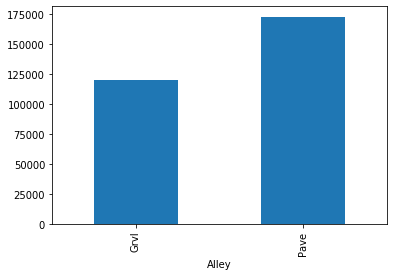

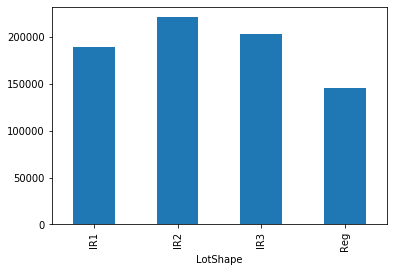

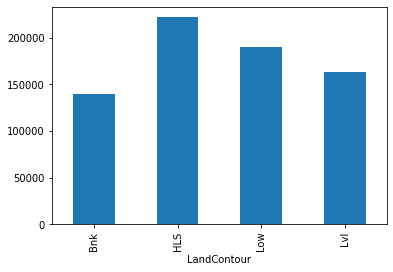

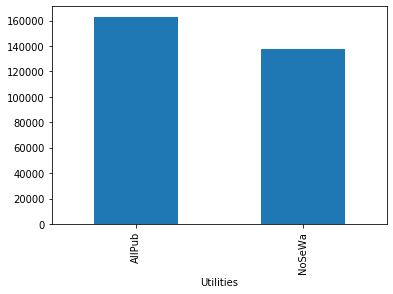

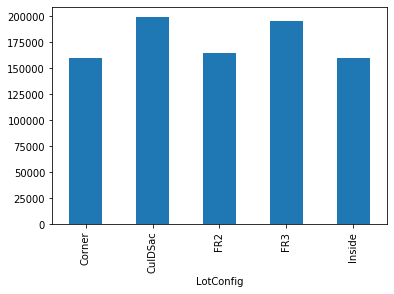

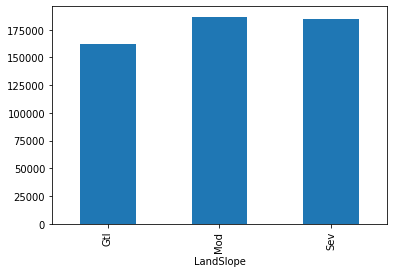

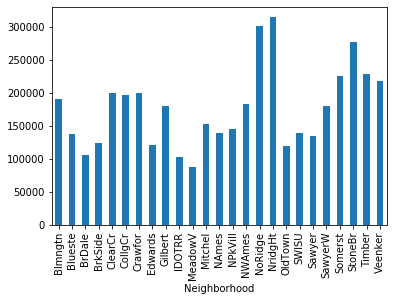

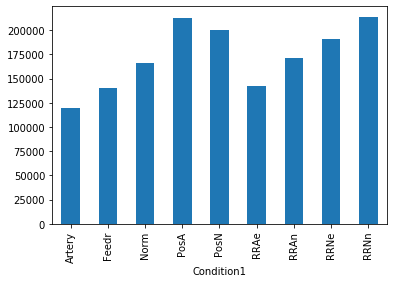

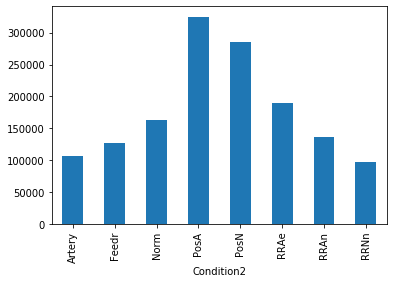

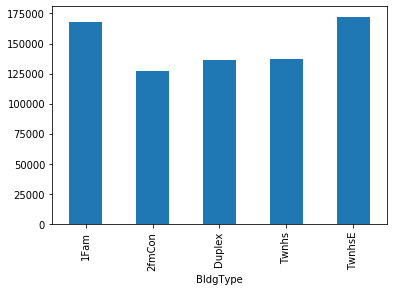

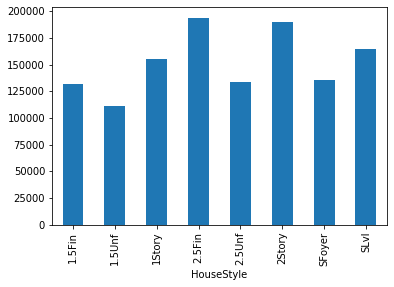

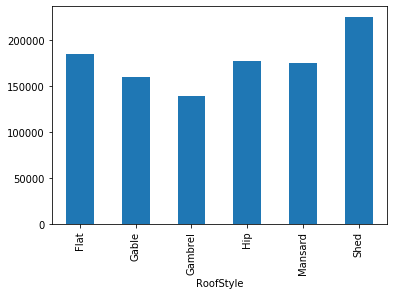

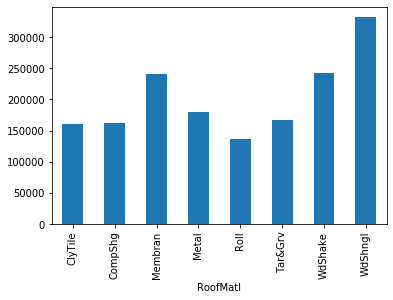

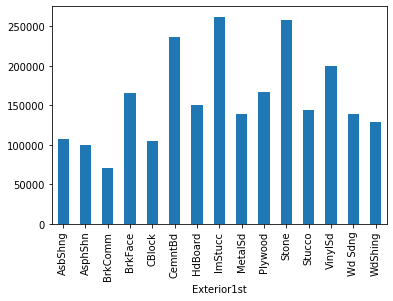

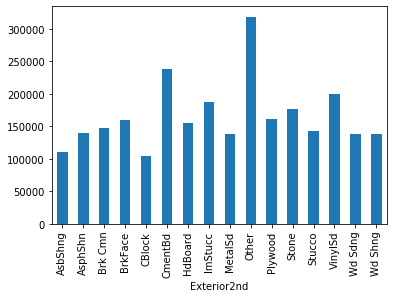

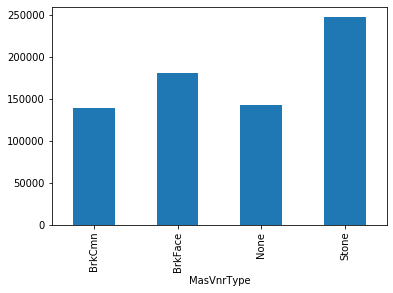

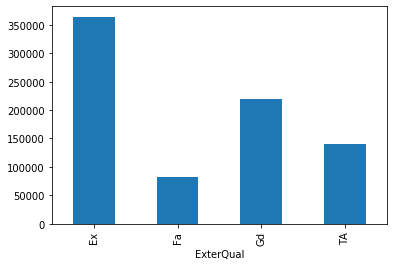

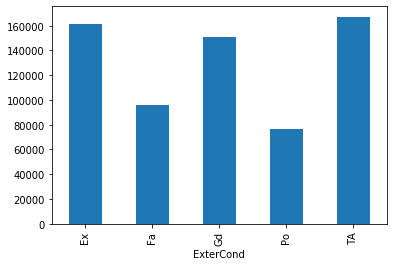

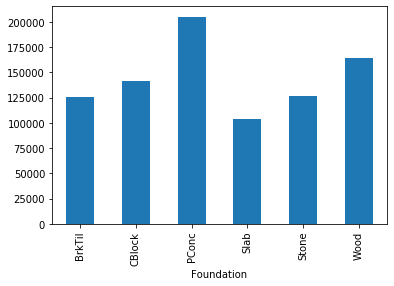

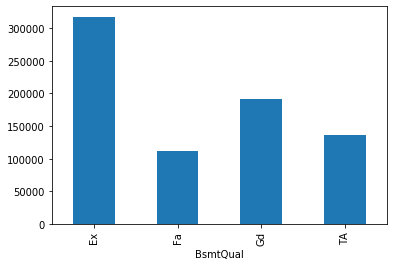

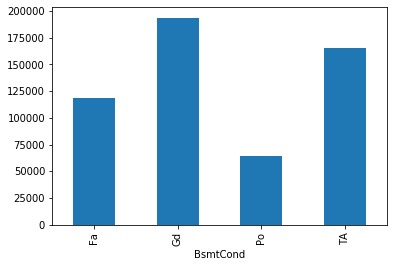

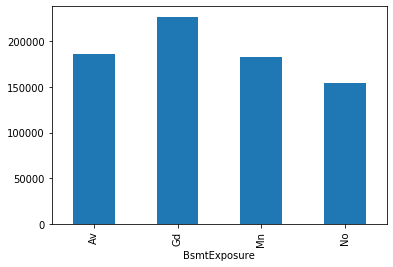

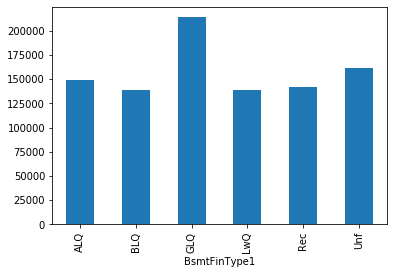

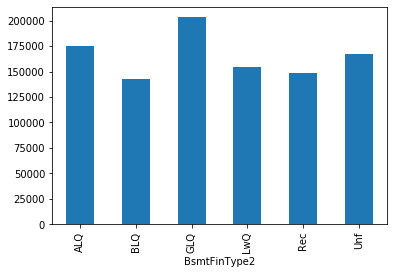

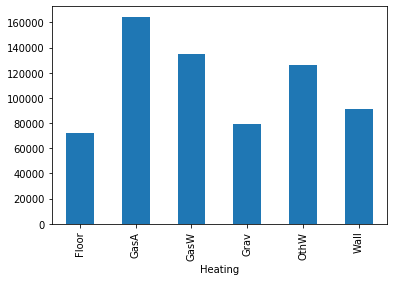

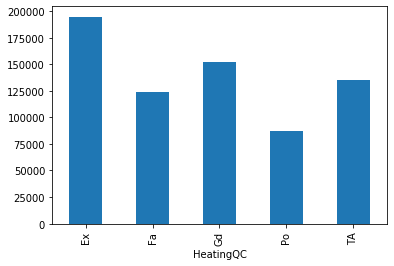

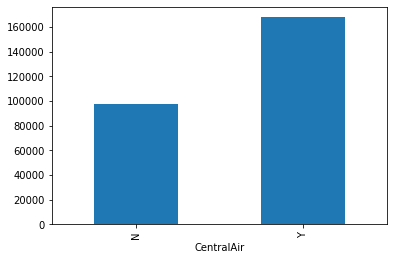

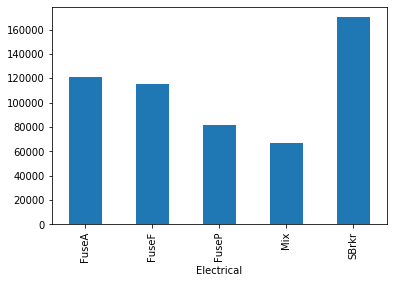

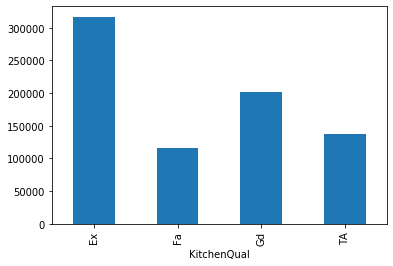

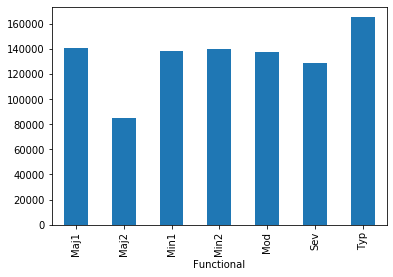

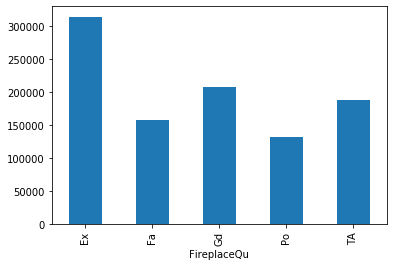

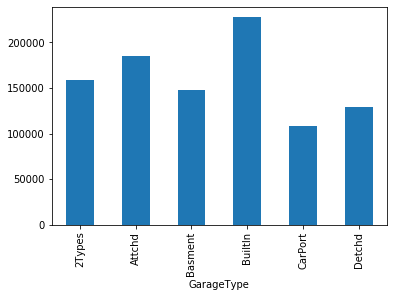

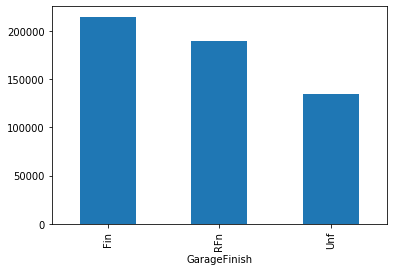

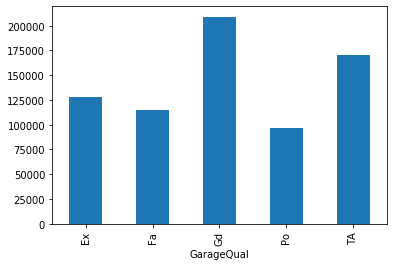

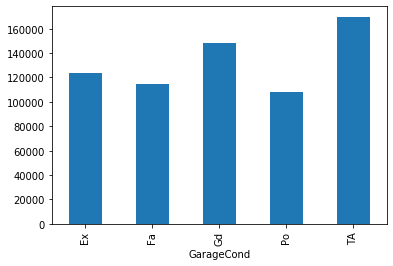

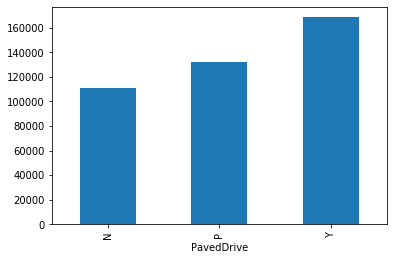

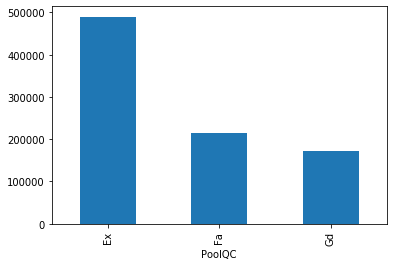

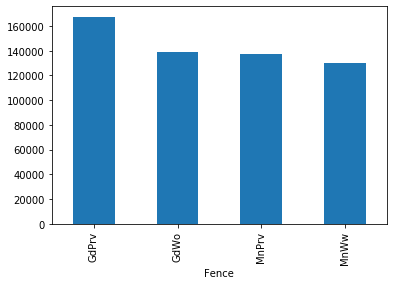

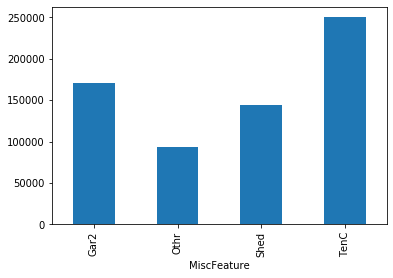

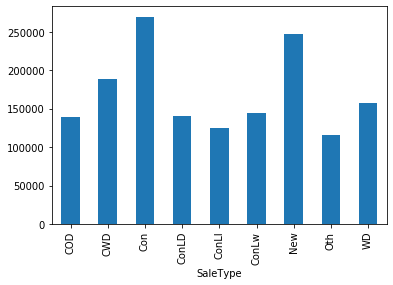

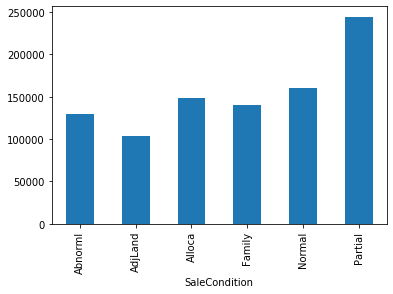

In [420]:
for feature in cat_feature :
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.show()

# outlier

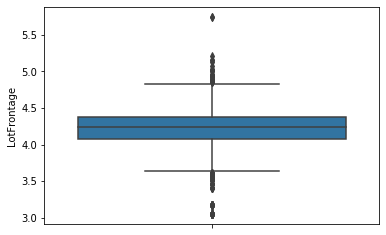

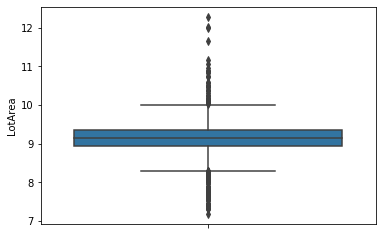

[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.270e+02 5.060e+02 2.970e+02       nan 6.040e+02 2.540e+02
 3.600e+01 1.020e+02 4.720e+02 4.810e+02 1.080e+02 3.020e+02 1.720e+02
 3.990

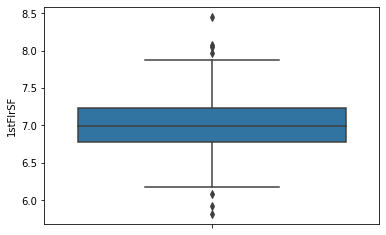

[ 854    0  866  756 1053  566  983  752 1142 1218  668 1320  631  716
  676  860 1519  530  808  977 1330  833  765  462  213  548  960  670
 1116  876  612 1031  881  790  755  592  939  520  639  656 1414  884
  729 1523  728  351  688  941 1032  848  836  475  739 1151  448  896
  524 1194  956 1070 1096  467  547  551  880  703  901  720  316 1518
  704 1178  754  601 1360  929  445  564  882  920  518  817 1257  741
  672 1306  504 1304 1100  730  689  591  888 1020  828  700  842 1286
  864  829 1092  709  844 1106  596  807  625  649  698  840  780  568
  795  648  975  702 1242 1818 1121  371  804  325  809 1200  871 1274
 1347 1332 1177 1080  695  167  915  576  605  862  495  403  838  517
 1427  784  711  468 1081  886  793  665  858  874  526  590  406 1157
  299  936  438 1098  766 1101 1028 1017 1254  378 1160  682  110  600
  678  834  384  512  930  868  224 1103  560  811  878  574  910  620
  687  546  902 1000  846 1067  914  660 1538 1015 1237  611  707  527
 1288 

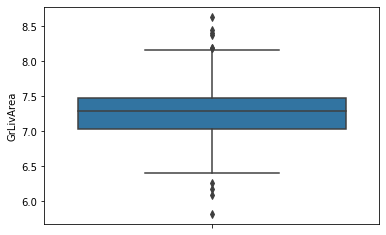

[ 548  460  608  642  836  480  636  484  468  205  384  736  352  840
  576  516  294  853  280  534  572  270  890  772  319  240  250  271
  447  556  691  672  498  246    0  440  308  504  300  670  826  386
  388  528  894  565  641  288  645  852  558  220  667  360  427  490
  379  297  283  509  405  758  461  400  462  420  432  506  684  472
  366  476  410  740  648  273  546  325  792  450  180  430  594  390
  540  264  530  435  453  750  487  624  471  318  766  660  470  720
  577  380  434  866  495  564  312  625  680  678  726  532  216  303
  789  511  616  521  451 1166  252  497  682  666  786  795  856  473
  398  500  349  454  644  299  210  431  438  675  968  721  336  810
  494  457  818  463  604  389  538  520  309  429  673  884  868  492
  413  924 1053  439  671  338  573  732  505  575  626  898  529  685
  281  539  418  588  282  375  683  843  552  870  888  746  708  513
 1025  656  872  292  441  189  880  676  301  474  706  617  445  200
  592 

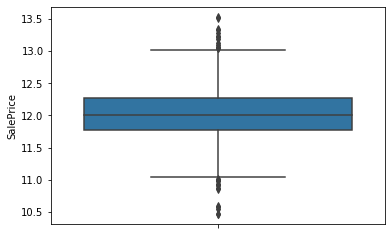

In [421]:
 data=df.copy()
for feature in continue_feature :
    if 0 in data[feature].unique():
        print(data[feature].unique())
        pass
    else :
        sns.boxplot(y=np.log(data[feature]),data=data)
        plt.show()

# feature engineering

In [422]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [423]:
data=df.copy()
numeric_feature=[feature for feature in df if data[feature].dtypes != "O" ]

# replacement of NaN numeric value with median

In [424]:
numeric_feature

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [425]:
data=df.copy()
numeric_nan=[feature for feature in numeric_feature if data[feature].isnull().sum() > 1]
numeric_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [426]:
for feature in numeric_nan :
    df[feature] = df[fearture].fillna(df[feature].median())
    data[feature+"_nan"] = np.where(data[feature].isnull(),1,0)

# replacement of  NaN catogorical feature with missing value

In [427]:
cat_feature=[feature for feature in df if df[feature].dtypes == "O" ]

In [428]:
cat_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [429]:
cat_feature_nan=[feature for feature in cat_feature if df[feature].isnull().sum() >= 1]
cat_feature_nan

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [430]:
data=df.copy()
for feature in cat_feature_nan :
    df[feature]=df[feature].fillna("missing")
    data[feature+"_nan"]=np.where(data[feature].isnull(),1,0)

In [431]:
df[cat_feature_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

# handling temp variables

In [432]:
for feature in temp_feature :
    if feature != "YrSold" :
        df[feature]=df["YrSold"]-df[feature]

In [433]:
df[temp_feature]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,0,2008
1,31,31,0,2007
2,7,6,0,2008
3,91,36,0,2006
4,8,8,0,2008
...,...,...,...,...
1455,8,7,0,2007
1456,32,22,0,2010
1457,69,4,0,2010
1458,60,14,0,2010


# handling rare labels

In [434]:
data=df.copy()
for feature in cat_feature :
    temp=data.groupby(feature)["SalePrice"].count()/data.shape[0] 
    temp_df=temp[temp>0.10].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],"rare")
        

In [435]:
df.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,2008,8450,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,2,2008,WD,Normal,208500
1,2,20,RL,2007,9600,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,5,2007,WD,Normal,181500
2,3,60,RL,2008,11250,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,9,2008,WD,Normal,223500
3,4,70,RL,2006,9550,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,2,2006,WD,rare,140000
4,5,60,RL,2008,14260,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,2009,9765,Pave,missing,rare,Lvl,AllPub,...,0,missing,missing,rare,480,4,2009,WD,Normal,185000
96,97,20,RL,2006,10264,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,8,2006,WD,Normal,214000
97,98,20,RL,2007,10921,Pave,missing,Reg,rare,AllPub,...,0,missing,missing,missing,0,5,2007,WD,Normal,94750
98,99,30,RL,2010,10625,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,rare,400,5,2010,rare,rare,83000


In [436]:
for feature in continue_feature :
    if 0 in df[feature].unique():
        pass
    else :
        df[feature]=np.log(df[feature])
        print(feature)

LotFrontage
LotArea
MasVnrArea
1stFlrSF
GrLivArea
SalePrice


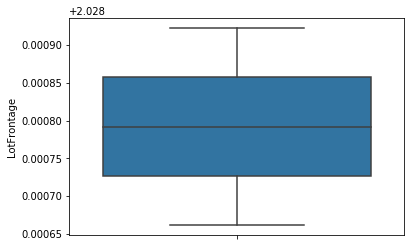

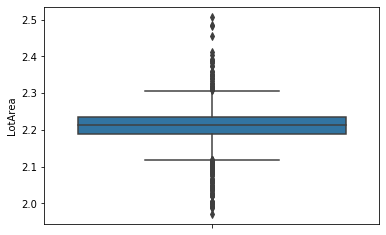

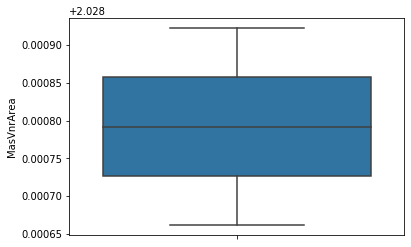

[ 706  978  486  216  655  732 1369  859    0  851  906  998  737  733
  578  646  504  840  188  234 1218 1277 1018 1153 1213  731  643  967
  747  280  179  456 1351   24  763  182  104 1810  384  490  649  632
  941  739  912 1013  603 1880  565  320  462  228  336  448 1201   33
  588  600  713 1046  648  310 1162  520  108  569 1200  224  705  444
  250  984   35  774  419  170 1470  938  570  300  120  116  512  567
  445  695  405 1005  668  821  432 1300  507  679 1332  209  680  716
 1400  416  429  222   57  660 1016  370  351  379 1288  360  639  495
  288 1398  477  831 1904  436  352  611 1086  297  626  560  390  566
 1126 1036 1088  641  617  662  312 1065  787  468   36  822  378  946
  341   16  550  524   56  321  842  689  625  358  402   94 1078  329
  929  697 1573  270  922  503 1334  361  672  506  714  403  751  226
  620  546  392  421  905  904  430  614  450  210  292  795 1285  819
  420  841  281  894 1464  700  262 1274  518 1236  425  692  987  970
   28 

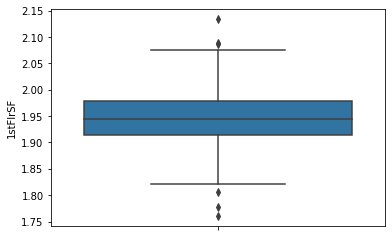

[ 854    0  866  756 1053  566  983  752 1142 1218  668 1320  631  716
  676  860 1519  530  808  977 1330  833  765  462  213  548  960  670
 1116  876  612 1031  881  790  755  592  939  520  639  656 1414  884
  729 1523  728  351  688  941 1032  848  836  475  739 1151  448  896
  524 1194  956 1070 1096  467  547  551  880  703  901  720  316 1518
  704 1178  754  601 1360  929  445  564  882  920  518  817 1257  741
  672 1306  504 1304 1100  730  689  591  888 1020  828  700  842 1286
  864  829 1092  709  844 1106  596  807  625  649  698  840  780  568
  795  648  975  702 1242 1818 1121  371  804  325  809 1200  871 1274
 1347 1332 1177 1080  695  167  915  576  605  862  495  403  838  517
 1427  784  711  468 1081  886  793  665  858  874  526  590  406 1157
  299  936  438 1098  766 1101 1028 1017 1254  378 1160  682  110  600
  678  834  384  512  930  868  224 1103  560  811  878  574  910  620
  687  546  902 1000  846 1067  914  660 1538 1015 1237  611  707  527
 1288 

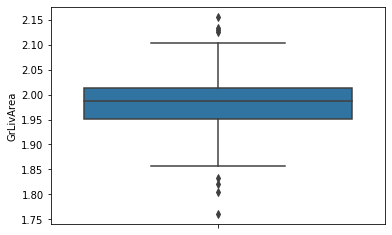

[ 548  460  608  642  836  480  636  484  468  205  384  736  352  840
  576  516  294  853  280  534  572  270  890  772  319  240  250  271
  447  556  691  672  498  246    0  440  308  504  300  670  826  386
  388  528  894  565  641  288  645  852  558  220  667  360  427  490
  379  297  283  509  405  758  461  400  462  420  432  506  684  472
  366  476  410  740  648  273  546  325  792  450  180  430  594  390
  540  264  530  435  453  750  487  624  471  318  766  660  470  720
  577  380  434  866  495  564  312  625  680  678  726  532  216  303
  789  511  616  521  451 1166  252  497  682  666  786  795  856  473
  398  500  349  454  644  299  210  431  438  675  968  721  336  810
  494  457  818  463  604  389  538  520  309  429  673  884  868  492
  413  924 1053  439  671  338  573  732  505  575  626  898  529  685
  281  539  418  588  282  375  683  843  552  870  888  746  708  513
 1025  656  872  292  441  189  880  676  301  474  706  617  445  200
  592 

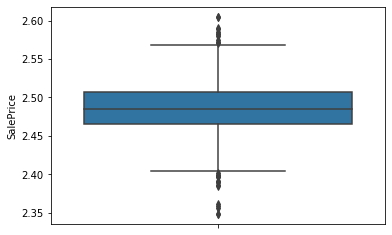

In [437]:
 data=df.copy()
for feature in continue_feature :
    if 0 in data[feature].unique():
        print(data[feature].unique())
        pass
    else :
        sns.boxplot(y=np.log(data[feature]),data=data)
        plt.show()

# coverting catogorical feature with numeric valude

In [438]:
cat_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [439]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,7.604894,9.041922,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,2,2008,WD,Normal,12.247694
1,2,20,RL,7.604396,9.169518,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,5,2007,WD,Normal,12.109011
2,3,60,RL,7.604894,9.328123,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,9,2008,WD,Normal,12.317167
3,4,70,RL,7.603898,9.164296,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,2,2006,WD,rare,11.849398
4,5,60,RL,7.604894,9.565214,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,12,2008,WD,Normal,12.429216


In [440]:
for feature in cat_feature:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [441]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,2,7.604894,9.041922,1,1,0,0,1,...,0,0,2,1,0,2,2008,0,0,12.247694
1,2,20,2,7.604396,9.169518,1,1,0,0,1,...,0,0,2,1,0,5,2007,0,0,12.109011
2,3,60,2,7.604894,9.328123,1,1,1,0,1,...,0,0,2,1,0,9,2008,0,0,12.317167
3,4,70,2,7.603898,9.164296,1,1,1,0,1,...,0,0,2,1,0,2,2006,0,1,11.849398
4,5,60,2,7.604894,9.565214,1,1,1,0,1,...,0,0,2,1,0,12,2008,0,0,12.429216
5,6,50,2,7.605392,9.554993,1,1,1,0,1,...,0,0,0,0,700,10,2009,0,0,11.870600
6,7,20,2,7.604396,9.218705,1,1,0,0,1,...,0,0,2,1,0,8,2007,0,0,12.634603
7,8,60,2,7.605392,9.247829,1,1,1,0,1,...,0,0,2,0,350,11,2009,0,0,12.206073
8,9,50,0,7.604894,8.719317,1,1,0,0,1,...,0,0,2,1,0,4,2008,0,1,11.774520
9,10,190,2,7.604894,8.911934,1,1,0,0,1,...,0,0,2,1,0,1,2008,0,0,11.678440


In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [451]:
column_to_scale=[ feature for feature in df.columns if feature not in ["Id","SalePrice"]]

In [452]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[column_to_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [453]:
#scaler.transform(df[column_to_scale])

In [461]:
df1=pd.DataFrame(scaler.transform(df[column_to_scale]),columns=column_to_scale)

In [463]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,1.0,0.500249,0.366344,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.0,0.0
1,0.000000,1.0,0.250187,0.391317,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.0,0.0
2,0.235294,1.0,0.500249,0.422359,1.0,1.0,0.5,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.0,0.0
3,0.294118,1.0,0.000000,0.390295,1.0,1.0,0.5,0.0,1.0,0.5,...,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.0,1.0
4,0.235294,1.0,0.500249,0.468761,1.0,1.0,0.5,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.0,0.0


In [464]:
df1["SalePrice"]=df["SalePrice"]

In [465]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,1.0,0.500249,0.366344,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.0,0.0,12.247694
1,0.000000,1.0,0.250187,0.391317,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.0,0.0,12.109011
2,0.235294,1.0,0.500249,0.422359,1.0,1.0,0.5,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.0,0.0,12.317167
3,0.294118,1.0,0.000000,0.390295,1.0,1.0,0.5,0.0,1.0,0.5,...,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.0,1.0,11.849398
4,0.235294,1.0,0.500249,0.468761,1.0,1.0,0.5,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.0,0.0,12.429216


In [468]:
df1.shape

(1460, 80)

In [466]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [469]:
x_train=df1.drop("SalePrice",axis=1)

In [470]:
x_train.shape

(1460, 79)

In [471]:
y_train=df1["SalePrice"]

In [474]:
y_train.shape

(1460,)

In [493]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)
feature_sel_model.get_support()

array([False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False,  True,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False,  True, False, False, False,  True, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [494]:

# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = x_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 79
selected features: 28
